## Classifying citrus leaves using a CNN
Using a dataset of citrus leaves, I have created a **CNN** model to predict if the leaves are healthy or have a certain condition.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt

### Input pipeline
Downloading the dataset and using **split** to create 3 different datasets, *training*, *validation* and *test*.

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'citrus_leaves',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True)


<function matplotlib.pyplot.show>

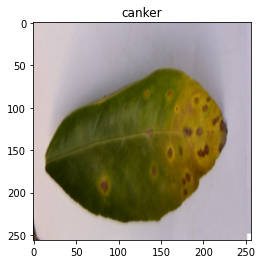

In [ ]:
num_classes = metadata.features['label'].num_classes
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))
plt.show

### Pre-processing layers

Resizing the data and normalizing the data to [0, 1].

In [ ]:
IMG_SIZE = 256

resize_and_rescale = models.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

Creating the data augmentation to be used in the model to add accuracy to the model.

In [ ]:
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomHeight(0.2),
    layers.RandomContrast(0.2)
])

Shuffling and batching the data to be used in the model.

In [ ]:
BATCH_SIZE = 16
AUTOTUNE = tf.data.AUTOTUNE
train_batch = train_ds.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
val_batch = val_ds.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
test_batch = test_ds.batch(BATCH_SIZE)

### Creating the model

In [ ]:
model = models.Sequential([
    data_augmentation,
    resize_and_rescale,
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
EPOCHS = 20
history = model.fit(train_batch,
                    validation_data=val_batch,
                    epochs=EPOCHS)

Epoch 1/20
30/30 [==============================] - 10s 70ms/step - loss: 2.2975 - accuracy: 0.2968 - val_loss: 1.2994 - val_accuracy: 0.2500
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 1.2605 - accuracy: 0.3642 - val_loss: 1.0578 - val_accuracy: 0.4167
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 1.1687 - accuracy: 0.4295 - val_loss: 0.9845 - val_accuracy: 0.5833
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 1.0656 - accuracy: 0.4758 - val_loss: 0.8961 - val_accuracy: 0.6167
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 1.0194 - accuracy: 0.5284 - val_loss: 0.8234 - val_accuracy: 0.5500
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.9375 - accuracy: 0.5789 - val_loss: 0.7517 - val_accuracy: 0.7500
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.8956 - accuracy: 0.6484 - val_loss: 0.6605 - val_accuracy: 0.7333
Epoch 8/20
3

### Results

In [ ]:
loss, acc = model.evaluate(test_batch)

4/4 [==============================] - 0s 28ms/step - loss: 0.4200 - accuracy: 0.8644


Graph to show how accuracy and loss are affected on the training and validation dataset according to the amount of epochs that the dataset has been trained on.

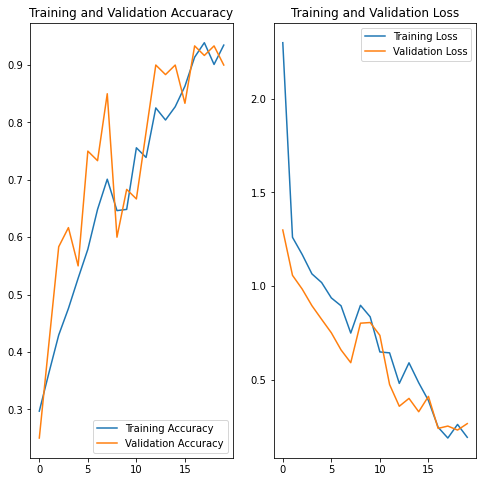

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuaracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()